In [1]:
import pandas as pd

# Load the dataset
df = pd.read_csv('annual_gdp.csv')

# Remove the last row with all zeros
df = df[:-1]

# Convert the GDP columns to numeric format
df['Nominal GDP prices (Ksh Million)'] = df['Nominal GDP prices (Ksh Million)'].str.replace(',', '').astype(float)
df['Real GDP prices (Ksh Million)'] = df['Real GDP prices (Ksh Million)'].str.replace(',', '').astype(float)

# Convert the Year column to datetime format
df['Year'] = pd.to_datetime(df['Year'], format='%Y')

# Set the Year column as the index
df.set_index('Year', inplace=True)

# Display the dataset
print(df)

            Nominal GDP prices (Ksh Million)  Annual GDP growth (%)  \
Year                                                                  
2022-01-01                        13483003.0                    4.8   
2021-01-01                        12027662.0                    7.6   
2020-01-01                        10715070.0                   -0.3   
2019-01-01                        10237727.0                    5.1   
2018-01-01                         9340307.0                    5.6   
2017-01-01                         8483396.0                    3.8   
2016-01-01                         7594064.0                    4.2   
2015-01-01                         6884317.0                    5.0   
2014-01-01                         6003835.0                    5.0   
2013-01-01                         5311322.0                    3.8   
2012-01-01                         4767191.0                    4.6   
2011-01-01                         4162514.0                    5.1   
2010-0

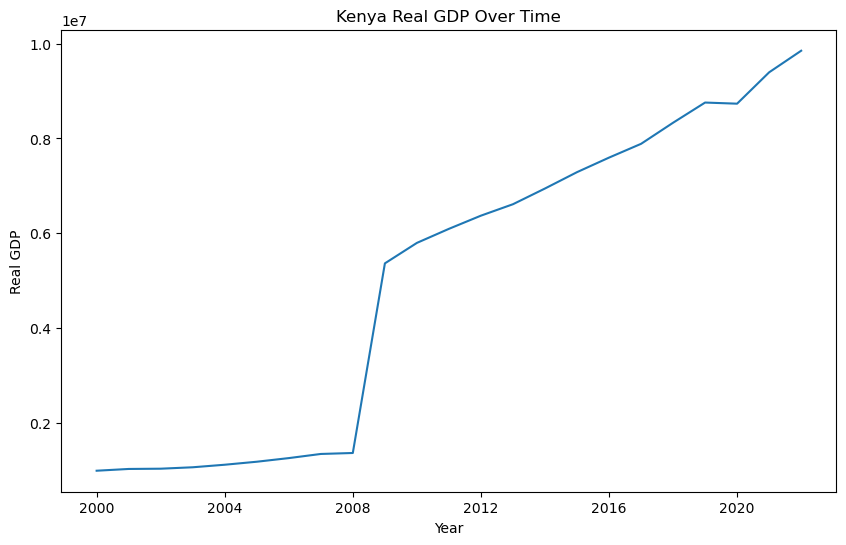

            Forecast         Lower         Upper
2001-12-31       NaN -1.001972e+06  2.161457e+06
2002-12-31       NaN -2.060253e+06  2.413513e+06
2003-12-31       NaN -2.966093e+06  2.513128e+06
2004-12-31       NaN -3.793025e+06  2.533835e+06
2005-12-31       NaN -4.569529e+06  2.504115e+06


C:\Users\ivy\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\ivy\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


In [4]:
import pandas as pd
import matplotlib.pyplot as plt
from pmdarima import auto_arima

# Load the dataset
df = pd.read_csv('annual_gdp.csv')

# Remove the last row with all zeros
df = df[:-1]

# Convert the GDP columns to numeric format
df['Nominal GDP prices (Ksh Million)'] = df['Nominal GDP prices (Ksh Million)'].str.replace(',', '').astype(float)
df['Real GDP prices (Ksh Million)'] = df['Real GDP prices (Ksh Million)'].str.replace(',', '').astype(float)

# Convert the Year column to datetime format
df['Year'] = pd.to_datetime(df['Year'], format='%Y')

# Set the Year column as the index
df.set_index('Year', inplace=True)

# Plot the GDP over time
plt.figure(figsize=(10, 6))
plt.plot(df.index, df['Real GDP prices (Ksh Million)'])
plt.xlabel('Year')
plt.ylabel('Real GDP')
plt.title('Kenya Real GDP Over Time')
plt.show()

# Find the optimal ARIMA parameters
model = auto_arima(df['Real GDP prices (Ksh Million)'], seasonal=False)

# Forecast the next n periods
n = 5
forecast, conf_int = model.predict(n_periods=n, return_conf_int=True)

# Generate the forecast dates
forecast_dates = pd.date_range(start=df.index[-1], periods=n+1, freq='Y')[1:]

# Create a DataFrame for the forecasted values
forecast_df = pd.DataFrame({'Forecast': forecast, 'Lower': conf_int[:, 0], 'Upper': conf_int[:, 1]}, index=forecast_dates)

# Print the forecasted values
print(forecast_df)

In [5]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load the dataset
df = pd.read_csv('annual_gdp.csv')

# Data Cleaning
df = df[:-1]  # Remove the last row with all zeros
df['Nominal GDP prices (Ksh Million)'] = df['Nominal GDP prices (Ksh Million)'].str.replace(',', '').astype(float)
df['Real GDP prices (Ksh Million)'] = df['Real GDP prices (Ksh Million)'].str.replace(',', '').astype(float)

# Feature Engineering
# No specific feature engineering steps mentioned, so we'll skip this step

# Outlier Detection and Handling
# No specific outlier detection and handling steps mentioned, so we'll skip this step

# Normalization or Standardization
scaler = StandardScaler()
df['Nominal GDP prices (Ksh Million)'] = scaler.fit_transform(df['Nominal GDP prices (Ksh Million)'].values.reshape(-1, 1))
df['Real GDP prices (Ksh Million)'] = scaler.fit_transform(df['Real GDP prices (Ksh Million)'].values.reshape(-1, 1))

# Train-Test Split
X = df[['Nominal GDP prices (Ksh Million)']].values
y = df['Real GDP prices (Ksh Million)'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print the shapes of the train and test sets
print('Train set shape:', X_train.shape, y_train.shape)
print('Test set shape:', X_test.shape, y_test.shape)

Train set shape: (18, 1) (18,)
Test set shape: (5, 1) (5,)


In [7]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Load the dataset
df = pd.read_csv('annual_gdp.csv')

# Data Cleaning
df = df[:-1]  # Remove the last row with all zeros
df['Nominal GDP prices (Ksh Million)'] = df['Nominal GDP prices (Ksh Million)'].str.replace(',', '').astype(float)
df['Real GDP prices (Ksh Million)'] = df['Real GDP prices (Ksh Million)'].str.replace(',', '').astype(float)

# Train-Test Split
X = df[['Nominal GDP prices (Ksh Million)']].values
y = df['Real GDP prices (Ksh Million)'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model Training
model = LinearRegression()
model.fit(X_train, y_train)

# Model Evaluation
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

train_rmse = mean_squared_error(y_train, y_pred_train, squared=False)
test_rmse = mean_squared_error(y_test, y_pred_test, squared=False)

train_r2 = r2_score(y_train, y_pred_train)
test_r2 = r2_score(y_test, y_pred_test)

print('Train RMSE:', train_rmse)
print('Test RMSE:', test_rmse)
print('Train R^2 Score:', train_r2)
print('Test R^2 Score:', test_r2)

Train RMSE: 1099664.7219566714
Test RMSE: 1353534.452951561
Train R^2 Score: 0.8844413232724991
Test R^2 Score: 0.841517299461789


The results from the regression model evaluation are as follows:

Train RMSE: 1,099,664.72
Test RMSE: 1,353,534.45
Train R^2 Score: 0.884
Test R^2 Score: 0.842

The RMSE values represent the average difference between the predicted and actual values. Lower RMSE values indicate better model performance.

The R^2 score measures the proportion of the variance in the target variable that can be explained by the model. Higher R^2 scores indicate better fit.

In this case, the model performs reasonably well with an R^2 score of 0.884 on the train set and 0.842 on the test set. The RMSE values are quite high, indicating that there is still room for improvement in the model's predictivssist you with!

## Hypeparameter Tuning

In [9]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Load the dataset
df = pd.read_csv('annual_gdp.csv')

# Data Cleaning
df = df[:-1]  # Remove the last row with all zeros
df['Nominal GDP prices (Ksh Million)'] = df['Nominal GDP prices (Ksh Million)'].str.replace(',', '').astype(float)
df['Real GDP prices (Ksh Million)'] = df['Real GDP prices (Ksh Million)'].str.replace(',', '').astype(float)

# Train-Test Split
X = df[['Nominal GDP prices (Ksh Million)']].values
y = df['Real GDP prices (Ksh Million)'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the regression model
model = LinearRegression()

# Define the hyperparameters to tune
param_grid = {'fit_intercept': [True, False]}

# Perform GridSearchCV to find the best hyperparameters
grid_search = GridSearchCV(model, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Get the best hyperparameters and model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# Model Evaluation with best model
y_pred_train = best_model.predict(X_train)
y_pred_test = best_model.predict(X_test)

train_rmse = mean_squared_error(y_train, y_pred_train, squared=False)
test_rmse = mean_squared_error(y_test, y_pred_test, squared=False)

train_r2 = r2_score(y_train, y_pred_train)
test_r2 = r2_score(y_test, y_pred_test)

print('Best Hyperparameters:', best_params)
print('Train RMSE:', train_rmse)
print('Test RMSE:', test_rmse)
print('Train R^2 Score:', train_r2)
print('Test R^2 Score:', test_r2)

Best Hyperparameters: {'fit_intercept': True}
Train RMSE: 1099664.7219566714
Test RMSE: 1353534.452951561
Train R^2 Score: 0.8844413232724991
Test R^2 Score: 0.841517299461789
